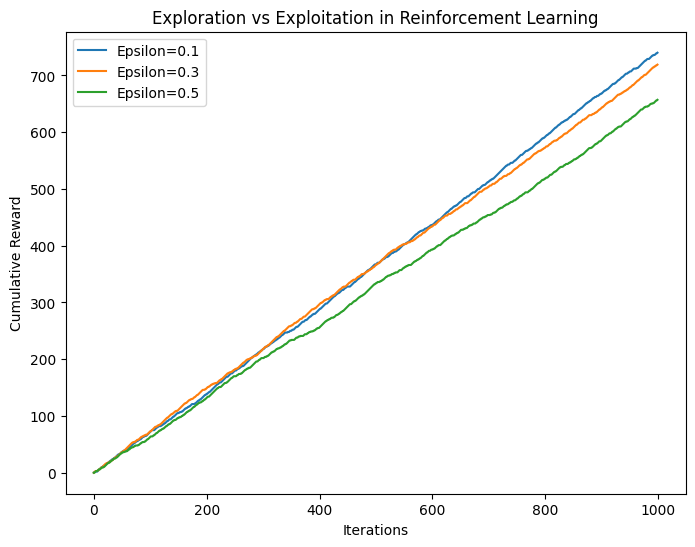

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the bandit problem with different arms having different reward probabilities
class Bandit:
    def __init__(self, arms):
        self.arms = arms

    def pull_arm(self, arm):
        return np.random.rand() < self.arms[arm]

# Epsilon-greedy algorithm for exploration and exploitation
def epsilon_greedy(epsilon, num_iterations, bandit):
    num_actions = len(bandit.arms)
    action_values = np.zeros(num_actions)
    action_attempts = np.zeros(num_actions)
    rewards = []

    for _ in range(num_iterations):
        if np.random.rand() < epsilon:
            # Exploration: Choose a random action
            action = np.random.randint(num_actions)
        else:
            # Exploitation: Choose the action with the highest estimated value
            action = np.argmax(action_values)

        reward = bandit.pull_arm(action)
        rewards.append(reward)

        # Update action attempts and estimated action values
        action_attempts[action] += 1
        action_values[action] += (reward - action_values[action]) / action_attempts[action]

    return rewards

# Define the bandit arms (reward probabilities)
arms = [0.3, 0.5, 0.8]  # Example probabilities

# Create a bandit environment
bandit = Bandit(arms)

# Run epsilon-greedy algorithm with different values of epsilon
epsilon_values = [0.1, 0.3, 0.5]
num_iterations = 1000

plt.figure(figsize=(8, 6))

for epsilon in epsilon_values:
    rewards = epsilon_greedy(epsilon, num_iterations, bandit)
    plt.plot(np.cumsum(rewards), label=f'Epsilon={epsilon}')

plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Exploration vs Exploitation in Reinforcement Learning')
plt.show()
